In [16]:
#credit card transaction fraud detection

In [17]:
import pandas as pd

In [18]:
#Load the dataset
df = pd.read_csv('../data/fraudTest.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [19]:
df.shape

(555719, 23)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [22]:
#Check for null values
df.isnull().value_counts()

Unnamed: 0  trans_date_trans_time  cc_num  merchant  category  amt    first  last   gender  street  city   state  zip    lat    long   city_pop  job    dob    trans_num  unix_time  merch_lat  merch_long  is_fraud
False       False                  False   False     False     False  False  False  False   False   False  False  False  False  False  False     False  False  False      False      False      False       False       555719
Name: count, dtype: int64

In [23]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [24]:
#Drop the unnecessary columns 
df.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [25]:
#Split the date and time
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Split into components
df['date'] = df['trans_date_trans_time'].dt.date
df['time'] = df['trans_date_trans_time'].dt.time

df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,date,time
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,12:14:25
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12:14:33
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,12:14:53
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,12:15:15
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,12:15:17


In [26]:
#Drop the unnecessary columns 
df.drop(columns = 'trans_date_trans_time', axis = 1, inplace = True)
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,date,time
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,...,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,12:14:25
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,...,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12:14:33
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,...,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,12:14:53
3,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,...,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,12:15:15
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,...,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,12:15:17


In [27]:
#Check for duplicates
df.duplicated().sum() 

np.int64(0)

In [28]:
#Separate the numerical and categorical columns 
numerical_columns = df.columns[df.dtypes != 'object']
categorical_columns = df.columns[df.dtypes == 'object']
print(f"Numerical columns: {numerical_columns}\nCategorical columns: {categorical_columns}")

Numerical columns: Index(['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')
Categorical columns: Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job', 'dob', 'trans_num', 'date', 'time'],
      dtype='object')


In [29]:
df[categorical_columns].describe()

,merchant,category,first,last,gender,street,city,state,job,dob,trans_num,date,time
count,555719,555719,555719,555719,555719,555719,555719,555719,555719,555719,555719,555719,555719
unique,693,14,341,471,2,924,849,50,478,910,555719,194,86092
top,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,444 Robert Mews,Birmingham,TX,Film/video editor,1977-03-23,2da90c7d74bd46a0caf3777415b3ebd3,2020-11-30,14:28:33
freq,1859,56370,11443,12146,304886,1474,2423,40393,4119,2408,1,6530,21


In [30]:
df['merchant'].unique()

array(['fraud_Kirlin and Sons', 'fraud_Sporer-Keebler',
       'fraud_Swaniawski, Nitzsche and Welch', 'fraud_Haley Group',
       'fraud_Johnston-Casper', 'fraud_Daugherty LLC',
       'fraud_Romaguera Ltd', 'fraud_Reichel LLC',
       'fraud_Goyette, Howell and Collier', 'fraud_Kilback Group',
       'fraud_Feil, Hilpert and Koss', 'fraud_Gottlieb Group',
       'fraud_Connelly-Carter', 'fraud_Bechtelar-Rippin',
       'fraud_Lubowitz-Walter', 'fraud_Welch, Rath and Koepp',
       'fraud_Hickle Group', 'fraud_Lang, Towne and Schuppe',
       'fraud_Morissette LLC', 'fraud_Prosacco LLC',
       'fraud_Corwin-Romaguera', 'fraud_Tillman LLC',
       'fraud_Veum-Koelpin', 'fraud_Watsica, Haag and Considine',
       'fraud_Leannon-Ward', 'fraud_Hintz, Bauch and Smith',
       'fraud_Labadie LLC', 'fraud_Eichmann, Hayes and Treutel',
       'fraud_Leffler-Goldner', 'fraud_Kautzer and Sons',
       'fraud_Ernser-Feest', 'fraud_Zemlak, Tillman and Cremin',
       'fraud_Nienow PLC', 'fraud_L

In [31]:
df['category'].unique()

array(['personal_care', 'health_fitness', 'misc_pos', 'travel',
       'kids_pets', 'shopping_pos', 'food_dining', 'home',
       'entertainment', 'shopping_net', 'misc_net', 'grocery_pos',
       'gas_transport', 'grocery_net'], dtype=object)

In [32]:
df['job'].unique()

array(['Mechanical engineer', 'Sales professional, IT',
       'Librarian, public', 'Set designer', 'Furniture designer',
       'Psychotherapist', 'Therapist, occupational',
       'Development worker, international aid', 'Advice worker',
       'Barrister', 'Pensions consultant', 'Freight forwarder',
       'Paramedic', 'Building surveyor', 'Materials engineer',
       'Commercial horticulturist', 'Town planner',
       'Radiographer, therapeutic', 'Surveyor, rural practice',
       'Energy manager', 'Prison officer',
       'Museum/gallery exhibitions officer', 'Media planner',
       'Seismic interpreter', 'Learning disability nurse',
       'Buyer, industrial', 'Scientific laboratory technician',
       'Counselling psychologist', 'Scientist, biomedical',
       'Audiological scientist', 'Stage manager',
       'Leisure centre manager', 'Community pharmacist', 'Risk analyst',
       'Clinical research associate', 'Librarian, academic',
       'Editor, magazine features', 'Ceramics

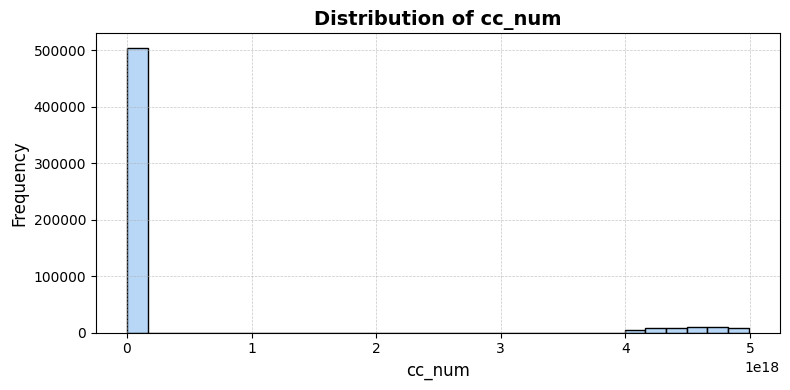

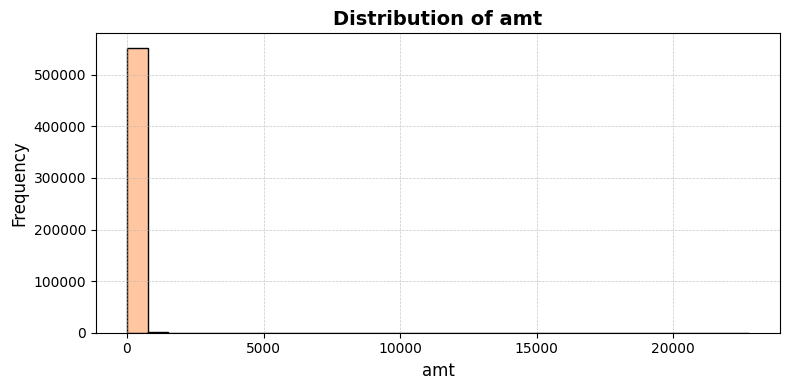

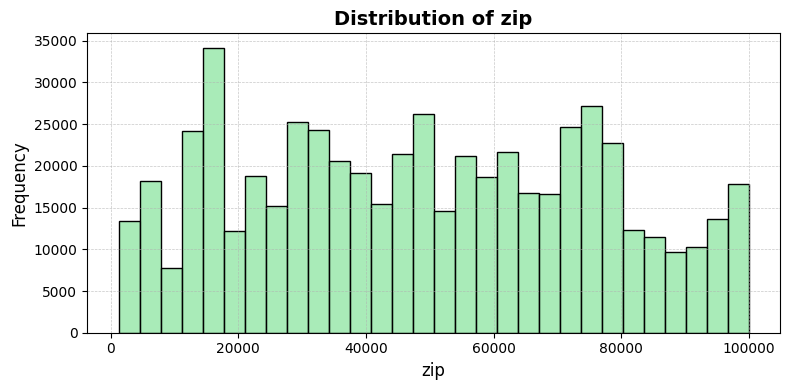

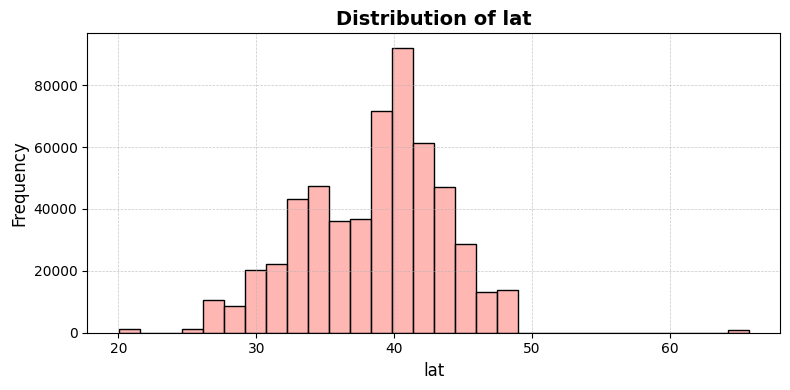

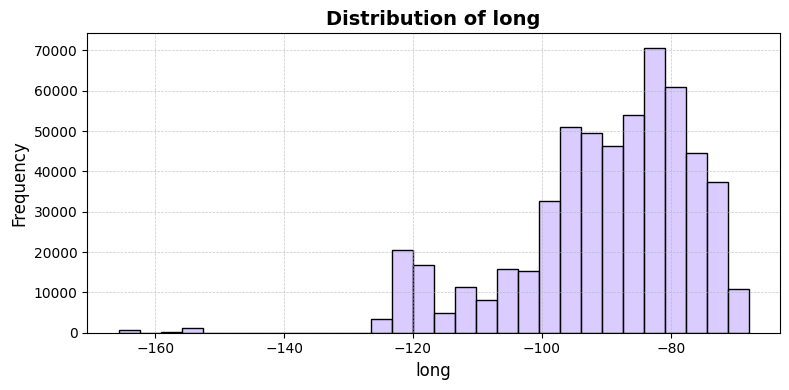

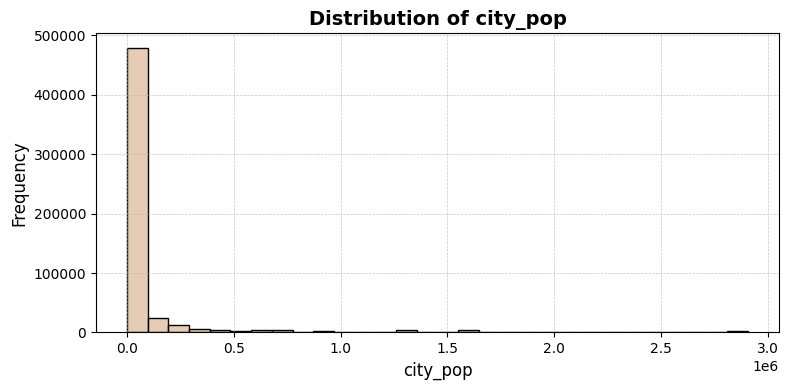

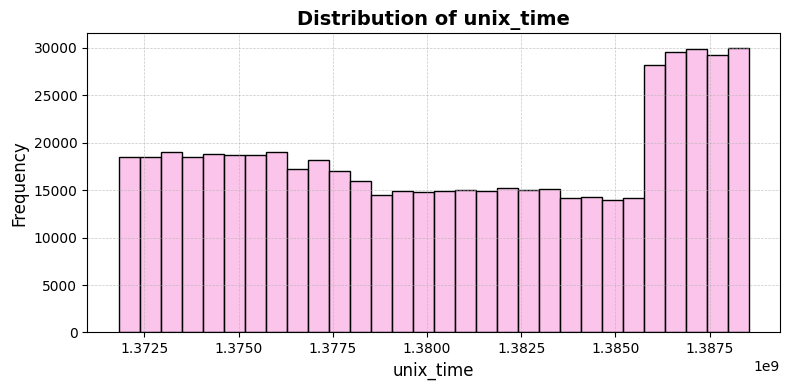

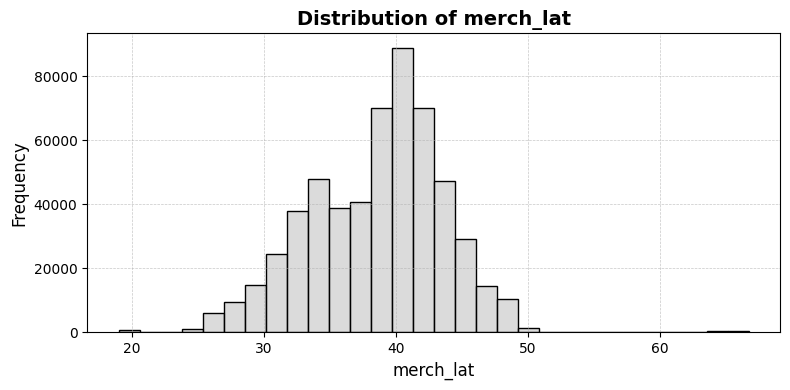

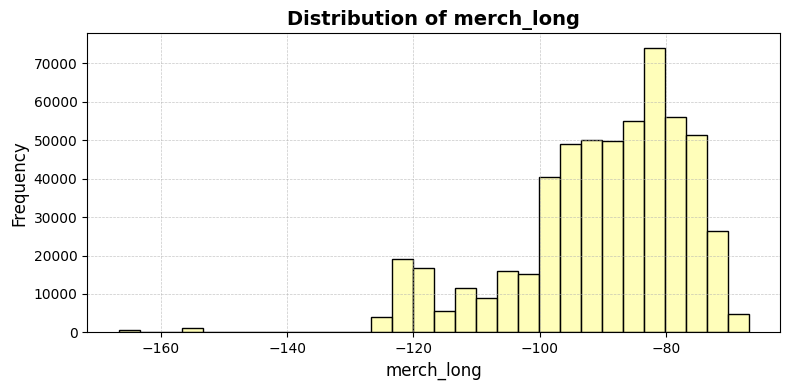

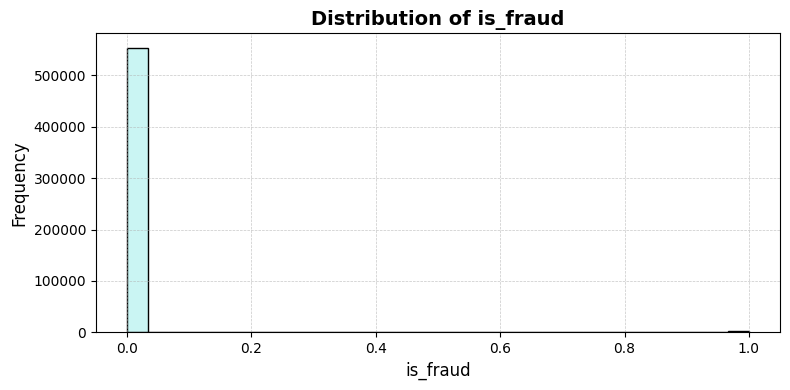

In [33]:
#Data Distribution of Numerical Columns
import seaborn as sns
import matplotlib.pyplot as plt

pastel_colors = sns.color_palette("pastel", len(numerical_columns))

for idx, col in enumerate(numerical_columns):
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, kde=False, bins=30, color=pastel_colors[idx])
    plt.title(f'Distribution of {col}', fontsize = 14, fontweight = 'bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()
    print('\n')

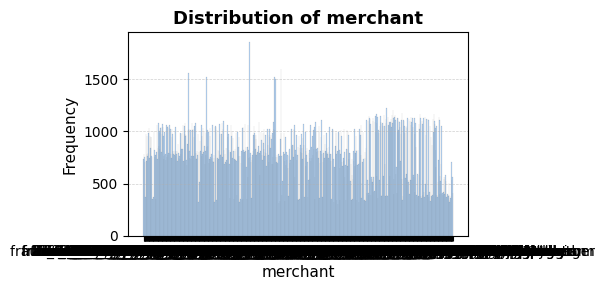

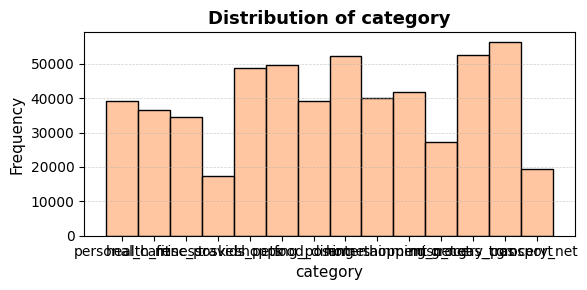

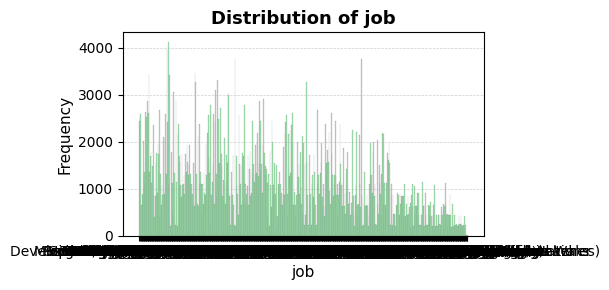

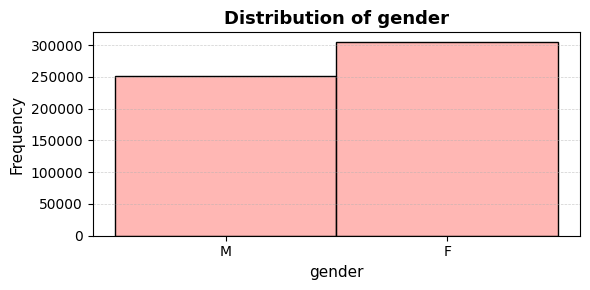

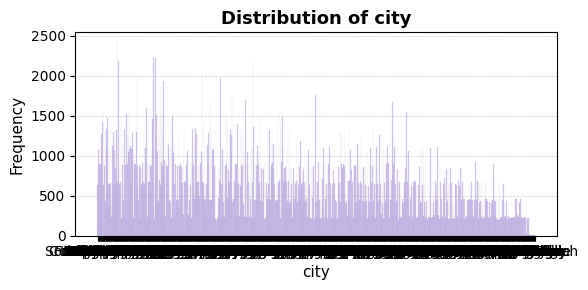

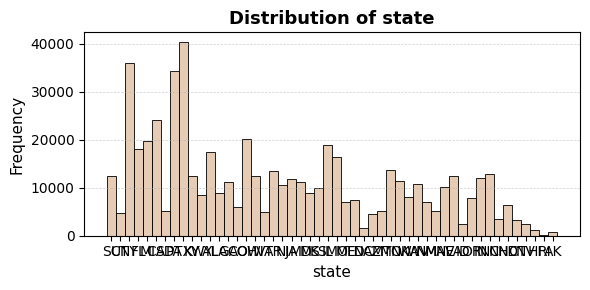

In [34]:
#Data Distribution of Categorical Columns
import seaborn as sns
import matplotlib.pyplot as plt

pastel_colors = sns.color_palette("pastel", len(['merchant', 'category', 'job', 'gender', 'city', 'state']))

for idx, col in enumerate(['merchant', 'category', 'job', 'gender', 'city', 'state']):
    plt.figure(figsize=(6, 3))
    sns.histplot(data=df, x=col, color=pastel_colors[idx])
    plt.title(f'Distribution of {col}', fontsize = 13, fontweight = 'bold')
    plt.xlabel(col, fontsize=11)
    plt.ylabel('Frequency', fontsize=11)
    plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.6)
    plt.tight_layout()
    plt.show()
    print('\n')

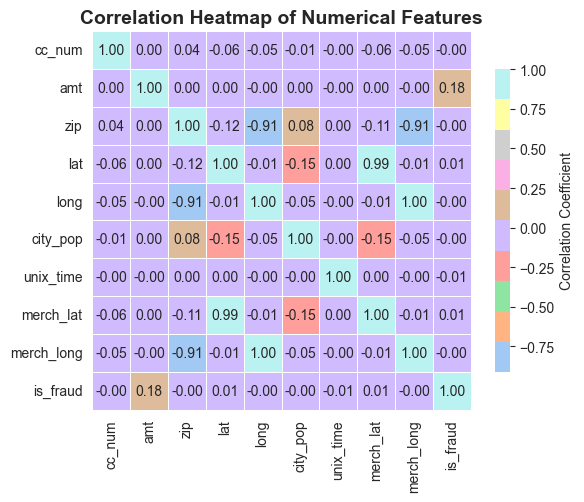

In [35]:
#Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(6,5))
sns.heatmap(
    df[numerical_columns].corr(),
    annot=True,
    fmt='.2f',
    cmap=sns.color_palette("pastel", as_cmap=True),
    linewidth=0.5,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}

)

plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

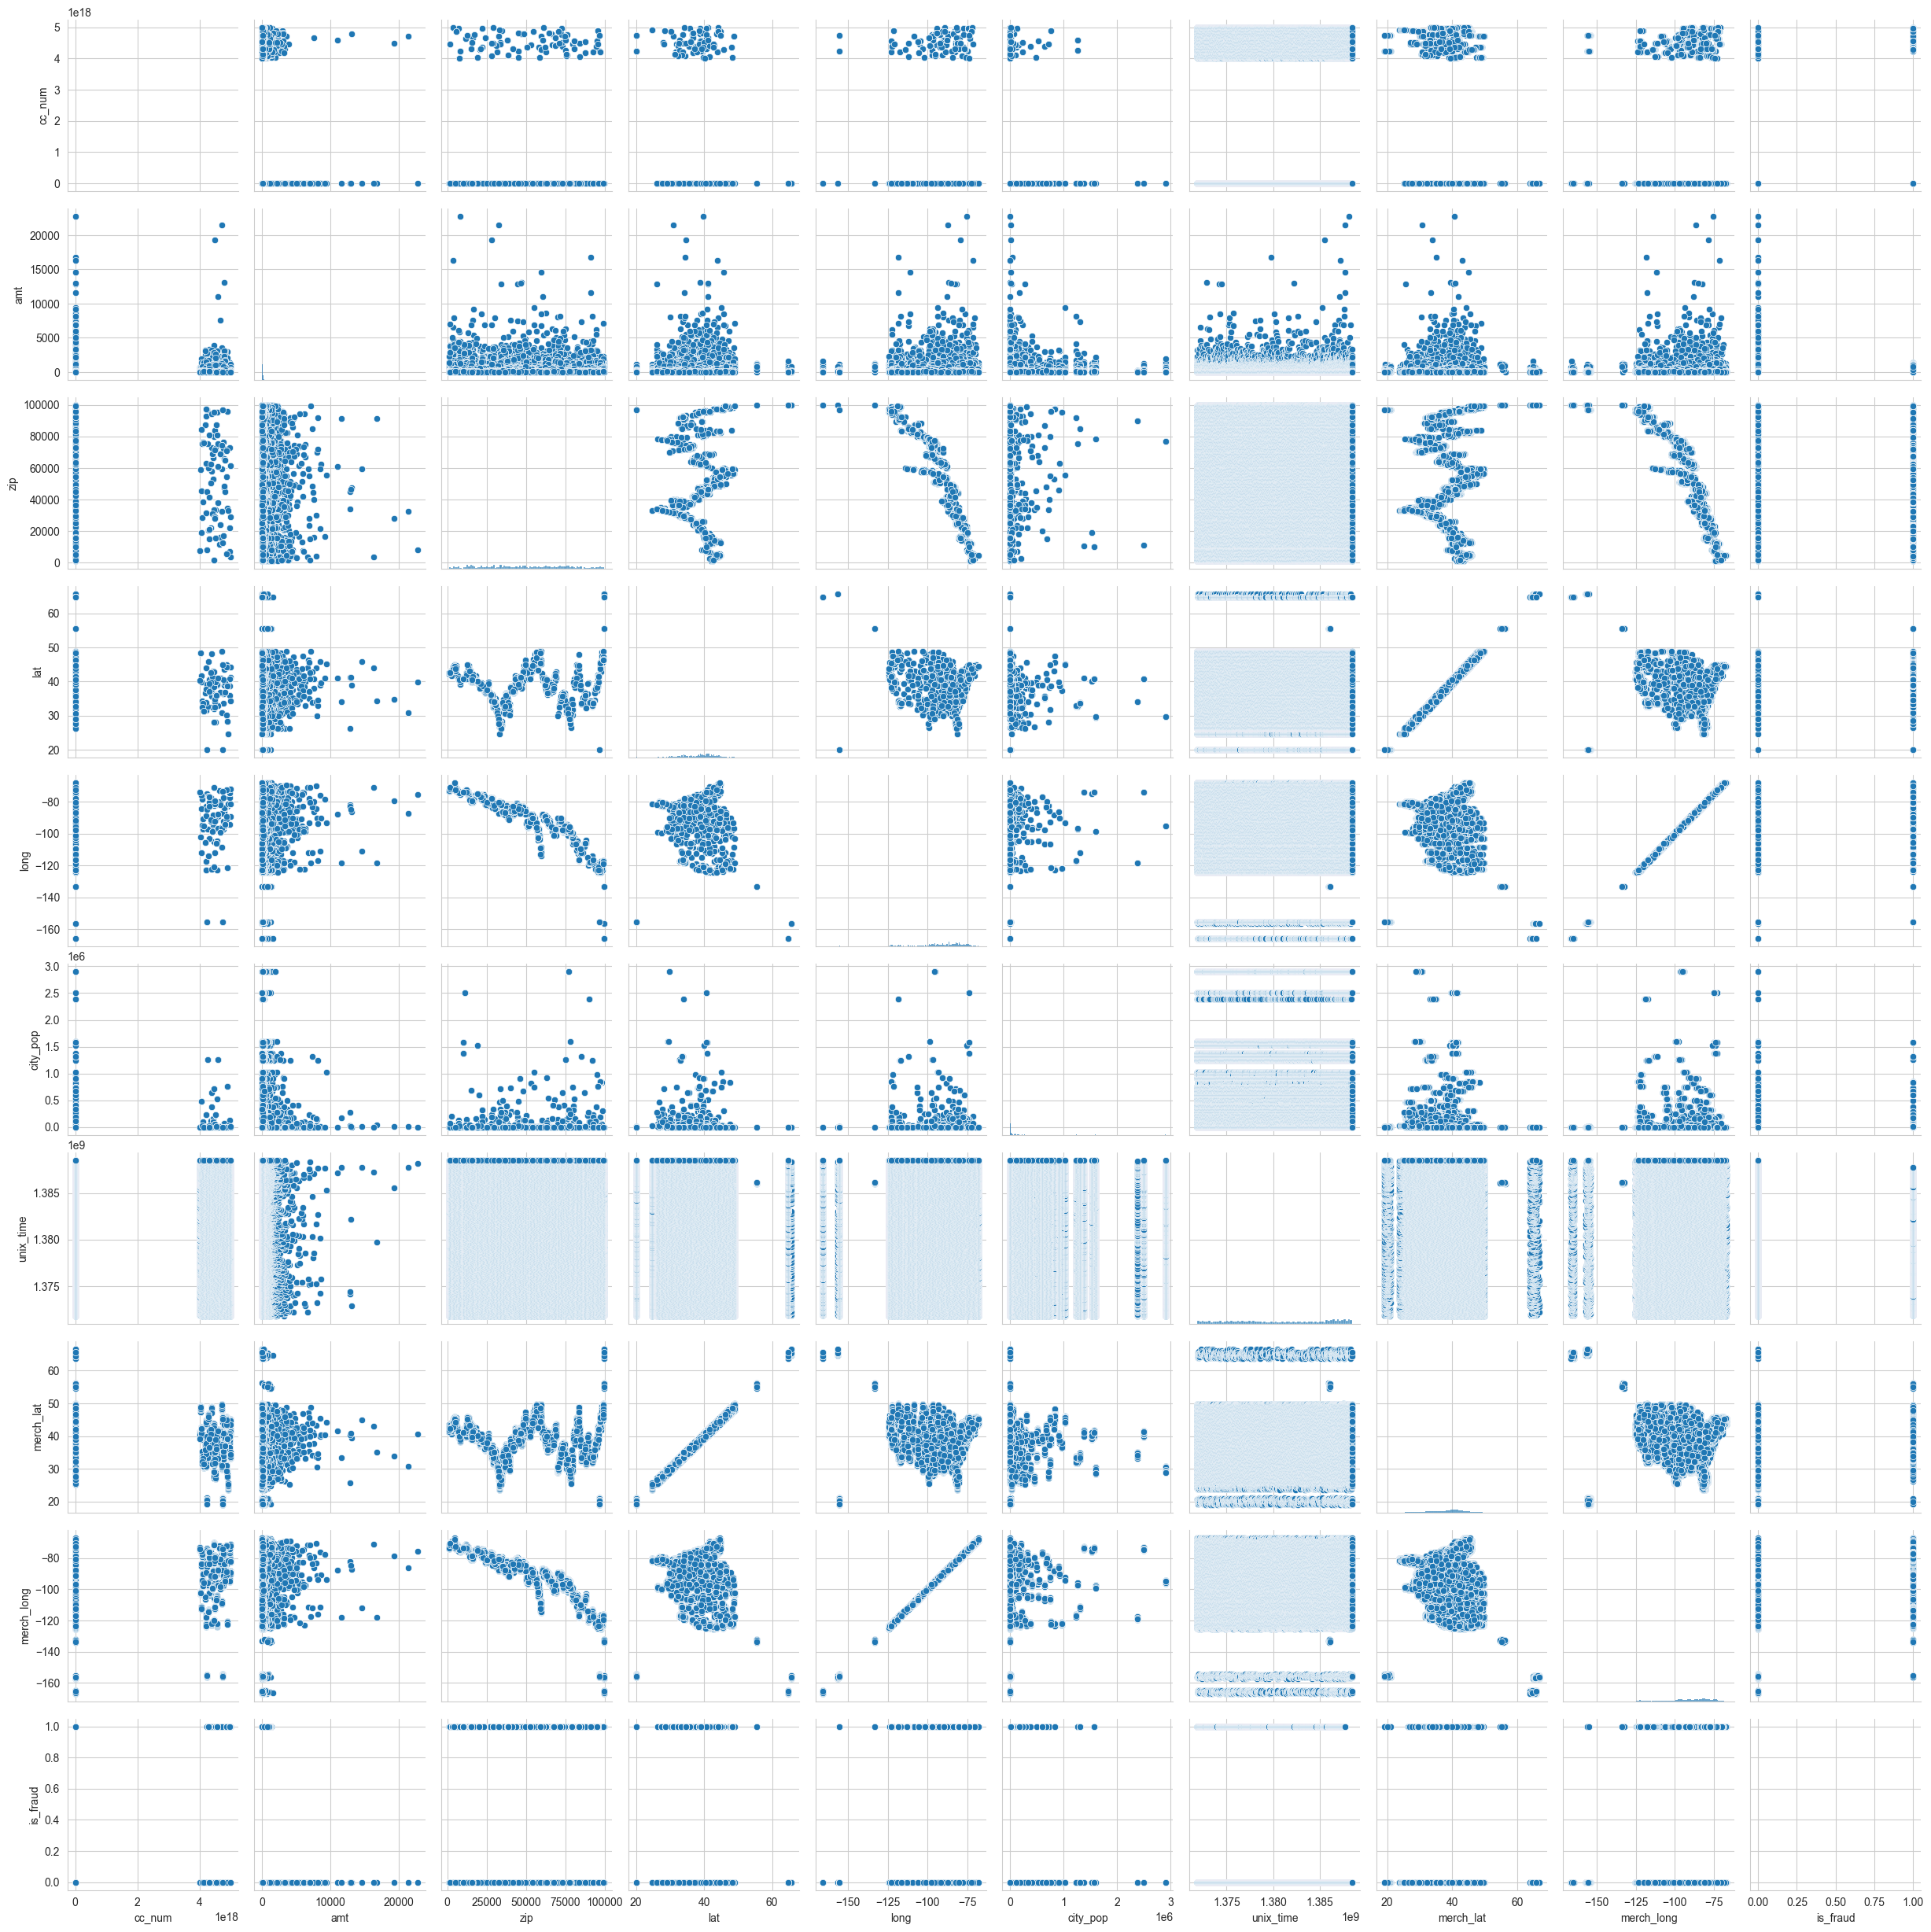

In [36]:
sns.pairplot(df)

In [37]:
#features between amount and category
category_amount_stats = df.groupby('category')['amt'].agg(['mean', 'median', 'std'])
display(category_amount_stats)

,mean,median,std
category,,,
entertainment,63.984840,51.050,64.229935
food_dining,50.777938,41.800,48.449053
gas_transport,63.577001,62.920,15.828399
grocery_net,53.731667,50.930,22.908437
grocery_pos,115.885327,104.840,51.552330
health_fitness,53.867432,42.620,47.965251
home,57.995413,48.230,48.085281
kids_pets,57.506913,47.020,48.748482
misc_net,78.600237,9.940,163.639089


In [38]:
#Create frequency based features
df['user_transaction_count'] = df.groupby('cc_num')['cc_num'].transform('count')
df['merchant_transaction_count'] = df.groupby('merchant')['merchant'].transform('count')
display(df.head())

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,date,time,user_transaction_count,merchant_transaction_count
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,...,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,12:14:25,640,736
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,...,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12:14:33,837,785
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,...,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,12:14:53,1073,755
3,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,...,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,12:15:15,663,711
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,...,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,12:15:17,891,370


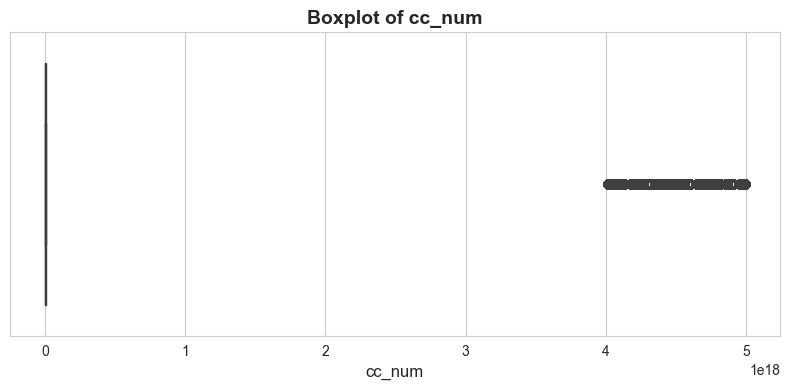

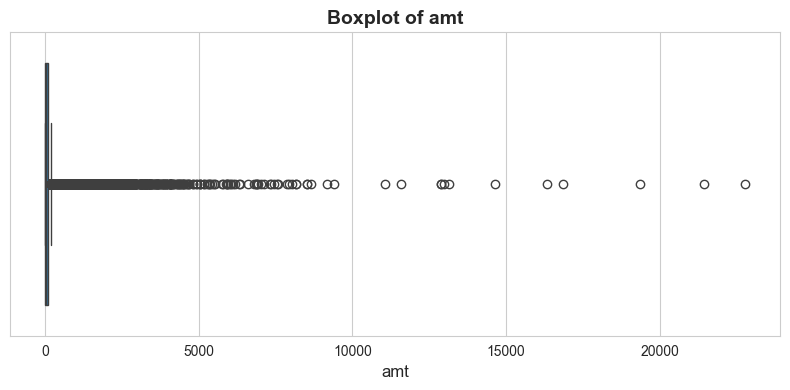

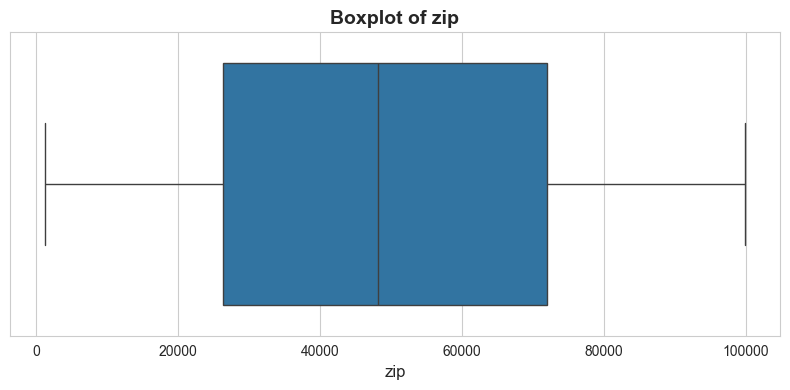

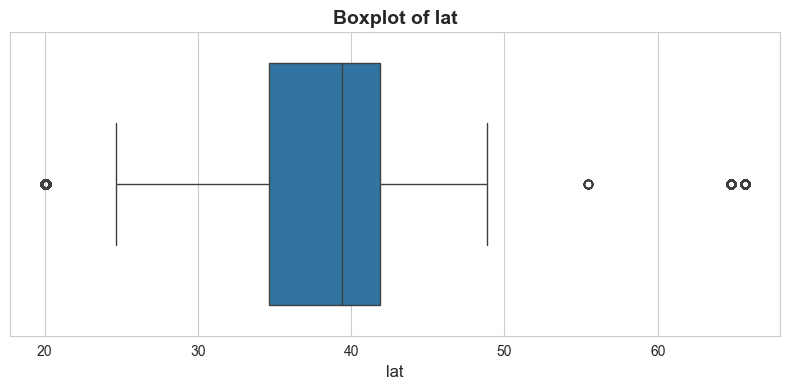

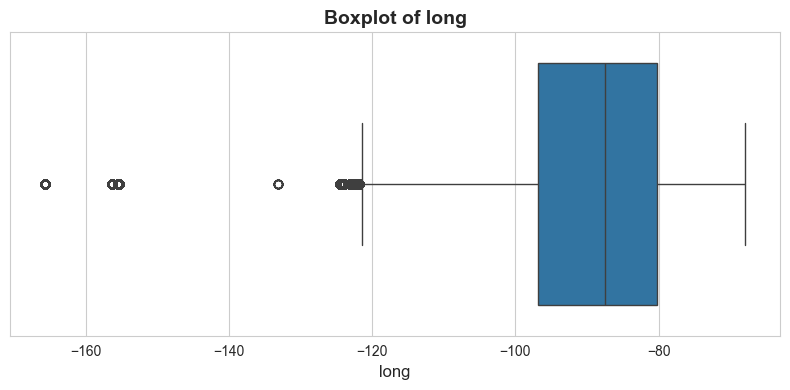

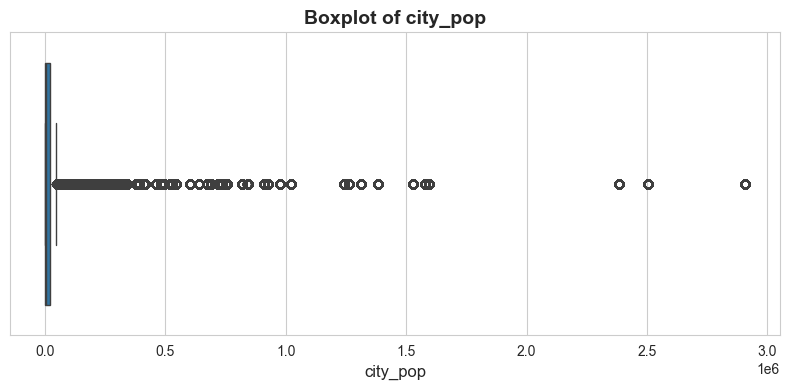

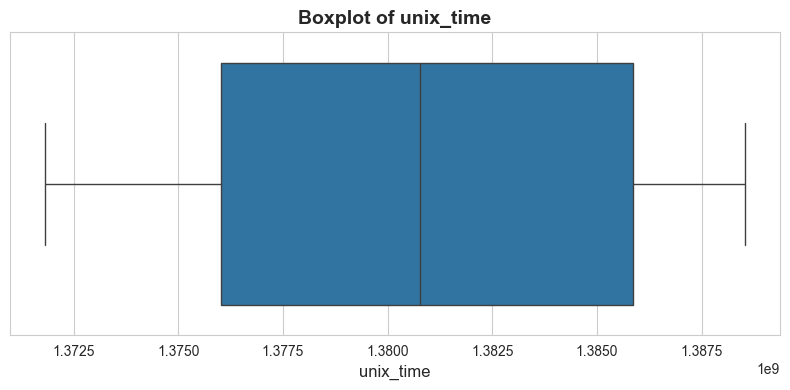

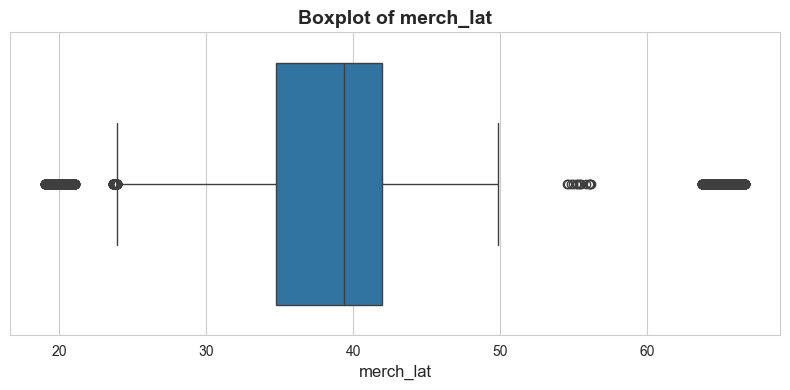

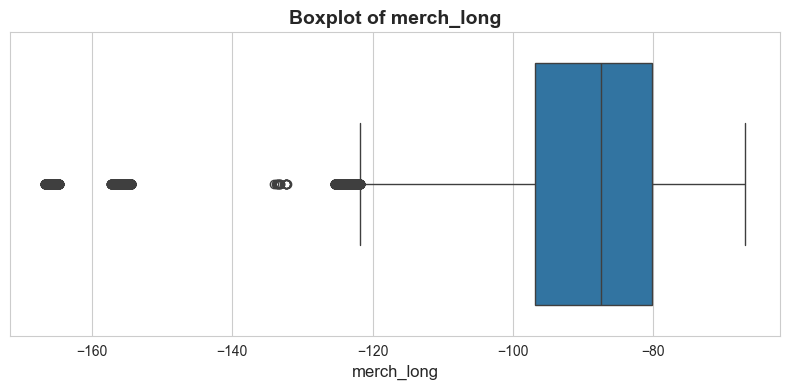

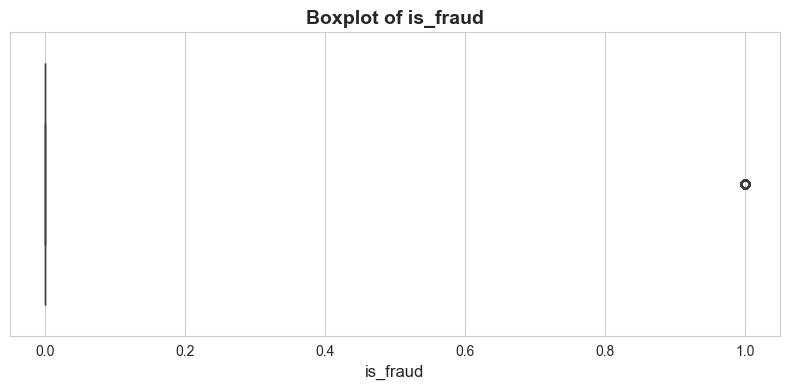

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for outliers in numerical columns using boxplots
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}', fontsize = 14, fontweight = 'bold')
    plt.xlabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()
    print('\n')

In [40]:
#Removal of Outlier using IQR Method
numerical_cols_to_clean = ['amt', 'city_pop', 'unix_time', 'user_transaction_count', 'merchant_transaction_count']

for col in numerical_cols_to_clean:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

display(df.head())

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,date,time,user_transaction_count,merchant_transaction_count
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,...,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12:14:33,837,785
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,...,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,12:14:53,1073,755
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,...,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,12:15:17,891,370
5,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,Breesport,NY,...,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0,2020-06-21,12:15:37,873,971
6,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,Carlotta,CA,...,1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0,2020-06-21,12:15:44,886,717


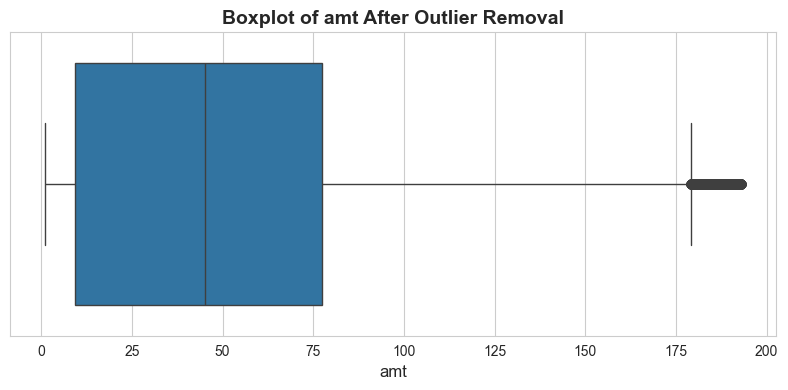

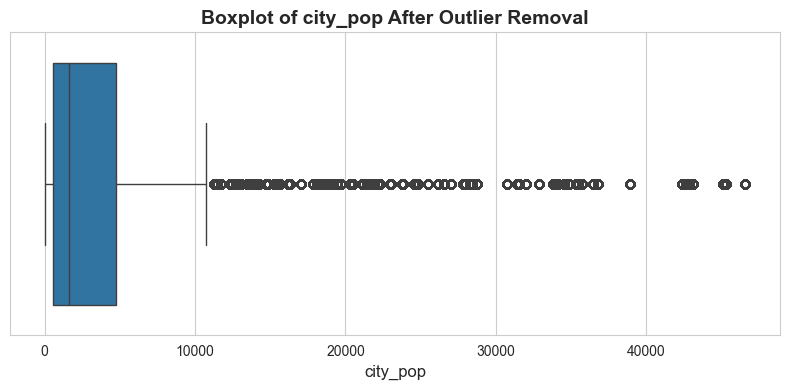

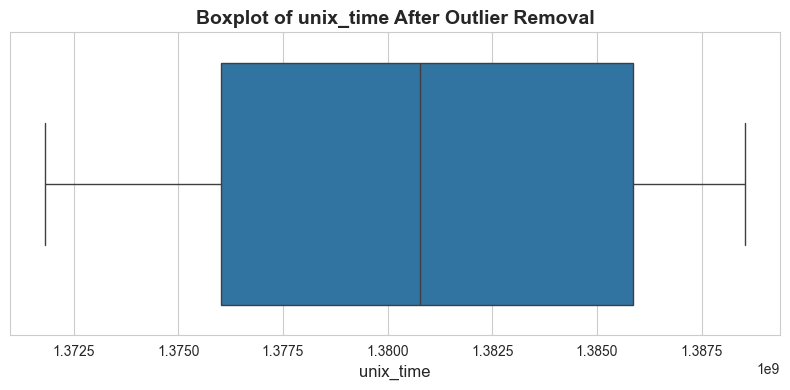

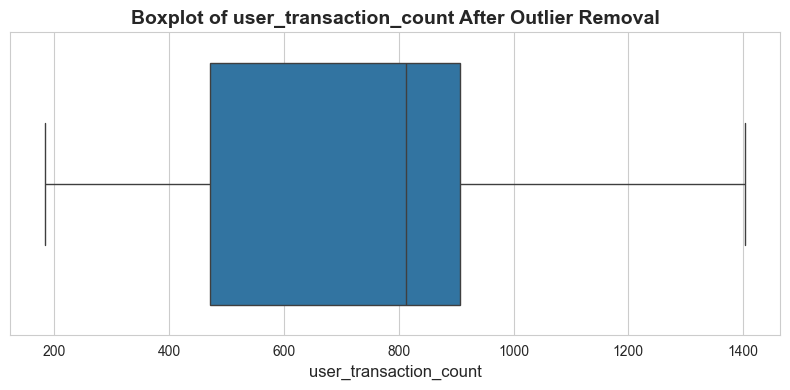

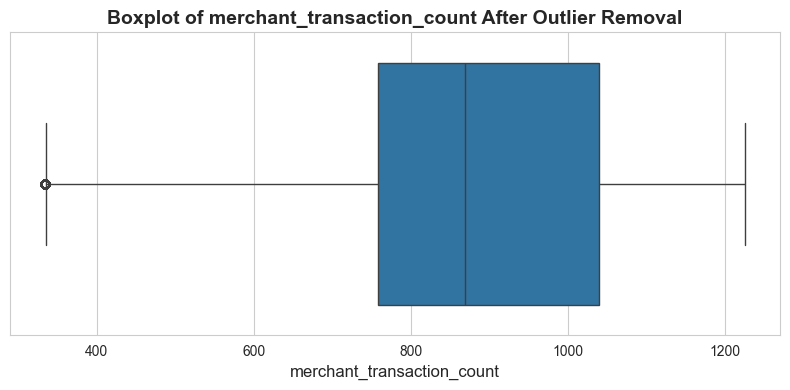

In [42]:
#Check the distribution after cleaning
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_cols_to_clean:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} After Outlier Removal', fontsize = 14, fontweight = 'bold')
    plt.xlabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()
    print('\n')

In [43]:
df.shape

(411268, 25)

In [44]:
df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'date', 'time', 'user_transaction_count', 'merchant_transaction_count'],
      dtype='object')

In [45]:
#Separate the Independent and Dependent features or Target (Y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (411268, 24)
Shape of target (y): (411268,)


In [46]:
numerical_columns_X = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns_X = X.select_dtypes(include=['object', 'category']).columns

print(f"Numerical columns in X: {numerical_columns_X}")
print(f"Categorical columns in X: {categorical_columns_X}")

Numerical columns in X: Index(['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'user_transaction_count',
       'merchant_transaction_count'],
      dtype='object')
Categorical columns in X: Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job', 'dob', 'trans_num', 'date', 'time'],
      dtype='object')


In [47]:
#Build numerical and categorical pipeline and then combine it

#Numerical pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [48]:
categorical_columns_X = X.select_dtypes(include=['object', 'category']).columns
print(f"Categorical columns in X: {categorical_columns_X}")

#Categorical pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

Categorical columns in X: Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job', 'dob', 'trans_num', 'date', 'time'],
      dtype='object')


In [49]:
#Load the dataset
df_train = pd.read_csv(r'C:\Users\Dona\Downloads\Pipeline_Fraud\notebook\data\fraudTrain.csv')
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,date,time,user_transaction_count,merchant_transaction_count
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,...,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12:14:33,837,785
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,...,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,12:14:53,1073,755
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,...,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,12:15:17,891,370
5,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,Breesport,NY,...,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0,2020-06-21,12:15:37,873,971
6,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,Carlotta,CA,...,1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0,2020-06-21,12:15:44,886,717


In [50]:
#Drop the unnecessary columns 
df_train.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])

# Split into components
df_train['date'] = df_train['trans_date_trans_time'].dt.date
df_train['time'] = df_train['trans_date_trans_time'].dt.time

In [51]:
#Drop the unnecessary columns 
df_train.drop(columns = 'trans_date_trans_time', axis = 1, inplace = True)

In [52]:
#Combining both the pipelines
from sklearn.compose import ColumnTransformer

# Redefine numerical and categorical columns based on df_train
numerical_columns_train = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns_train.remove('is_fraud') # Remove the target variable

categorical_columns_train = df_train.select_dtypes(include=['object', 'category']).columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns_train),
        ('cat', categorical_pipeline, categorical_columns_train)
    ],
    remainder='passthrough'
)
display(preprocessor)

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [53]:
display(df_train.head())
display(df.head())

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,date,time
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06


,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,date,time,user_transaction_count,merchant_transaction_count
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,...,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12:14:33,837,785
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,...,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,12:14:53,1073,755
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,...,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,12:15:17,891,370
5,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,Breesport,NY,...,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0,2020-06-21,12:15:37,873,971
6,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,Carlotta,CA,...,1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0,2020-06-21,12:15:44,886,717


In [54]:
# Apply the preprocessing pipeline to the training and testing data
X_train_processed = preprocessor.fit_transform(df_train.drop('is_fraud', axis=1))
X_test_processed = preprocessor.transform(df.drop('is_fraud', axis=1))

y_train = df_train['is_fraud']
y_test = df['is_fraud']

print("Shape of processed X_train:", X_train_processed.shape)
print("Shape of processed X_test:", X_test_processed.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of processed X_train: (1296675, 1388553)
Shape of processed X_test: (411268, 1388553)
Shape of y_train: (1296675,)
Shape of y_test: (411268,)


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Optimized Models
logistic_regression_model = LogisticRegression(random_state=42, solver='liblinear')

# Use fewer trees and enable parallel CPU usage
random_forest_model = RandomForestClassifier(
    n_estimators=30,       # Reduce from default 100 to 50 for speed
    max_depth =10,          # Limit depth to reduce complexity
    max_features='sqrt',  # Use square root of features for speed
    n_jobs=-1,             # Use all available CPU cores
    random_state=42,
    verbose=1              # Show training progress
)

gradient_boosting_model = GradientBoostingClassifier(
    n_estimators=30,       # Reduce estimators for quicker training
    learning_rate=0.1,     # You can increase to speed up learning
    max_depth=3,          # Limit depth to reduce complexity
    min_samples_split=5,  # Minimum samples to split an internal node
    random_state=42,
    verbose=1              # Show progress
)

# Store models in a dictionary
models = {
    "Logistic Regression": logistic_regression_model,
    "Random Forest": random_forest_model,
    "Gradient Boosting": gradient_boosting_model
}

# Train each model and record training time
for name, model in models.items():
    print(f"\n Training {name}...")
    model.fit(X_train_processed, y_train)
    print(f" {name} training complete.")



 Training Logistic Regression...
 Logistic Regression training complete.

 Training Random Forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.7s finished


 Random Forest training complete.

 Training Gradient Boosting...
      Iter       Train Loss   Remaining Time 
         1           0.0494            9.23m
         2           0.0404            9.18m
         3           0.0390            8.57m
         4           0.0380            8.06m
         5           0.0372            7.64m
         6           0.0355            7.28m
         7           0.0319            6.94m
         8           0.0312            6.74m
         9           0.0306            6.39m
        10           0.0302            6.10m
        20           0.0277            3.03m
        30           0.0268            0.00s
 Gradient Boosting training complete.


In [56]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, confusion_matrix
)

model_names = ["Random Forest", "Logistic Regression", "Gradient Boosting"]
results = {}

#Evaluate each model
for name in model_names:
    model = models[name]
    
    print(f"\n Evaluating {name}...")
    
    y_pred = model.predict(X_test_processed)
    y_proba = model.predict_proba(X_test_processed)[:, 1]  # Probability of the positive class

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC-AUC': roc_auc
    }

    print(f"{name} evaluation complete.")

#Compare Models
print("\n Model Comparison:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

#Best Model Based on F1-Score
# Best Model Based on F1-Score, Precision, and Recall (average of the three)
best_model_name = max(
    results,
    key=lambda k: (
        results[k]['F1-score'] + results[k]['Precision'] + results[k]['Recall']
    ) / 3
)
print(f"\n Best performing model based on F1-score, Precision and Recall: {best_model_name}")



 Evaluating Random Forest...


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  30 out of  30 | elapsed:    0.3s finished
c:\Users\Dona\Projects\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Random Forest evaluation complete.

 Evaluating Logistic Regression...


c:\Users\Dona\Projects\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Logistic Regression evaluation complete.

 Evaluating Gradient Boosting...
Gradient Boosting evaluation complete.

 Model Comparison:

Random Forest:
  Accuracy: 0.9989
  Precision: 0.0000
  Recall: 0.0000
  F1-score: 0.0000
  ROC-AUC: 0.4654

Logistic Regression:
  Accuracy: 0.9989
  Precision: 0.0000
  Recall: 0.0000
  F1-score: 0.0000
  ROC-AUC: 0.1576

Gradient Boosting:
  Accuracy: 0.9991
  Precision: 0.7107
  Recall: 0.2616
  F1-score: 0.3824
  ROC-AUC: 0.7749

 Best performing model based on F1-score, Precision and Recall: Gradient Boosting
